# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [11]:
import pandas as pd
hcahps = pd.read_csv('HCAHPS-Hospital.csv',na_values='Not Available')

hcahps_scores = hcahps[hcahps['HCAHPS Answer Description'].str[-17:]=='linear mean score']


index_list= ['Facility ID', 'Facility Name', 'Address', 'City','State','ZIP Code', 'Number of Completed Surveys', 'Survey Response Rate Percent', 'Start Date', 'End Date']
hcahps_scores_wide = hcahps_scores.pivot(index=index_list, columns='HCAHPS Question', values='HCAHPS Linear Mean Value')
hcahps_scores_all = hcahps_scores_wide.reset_index()


column_list = hcahps_scores_all.columns
for col in column_list:
    if col[-5:] == 'score':
        hcahps_scores_all[col] = pd.to_numeric(hcahps_scores_all[col])

# number of rows and columns
print('{} rows, {} columns'.format(hcahps_scores_all.shape[0], hcahps_scores_all.shape[1]))

4845 rows, 20 columns


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [12]:
unique_values = {}
for col in column_list:
    count = len(hcahps_scores_all[col].unique())
    unique_values[col] = count
    
print('The column with most disversity: {}'.format(max(unique_values, key=lambda key: unique_values[key])))
unique_values

The column with most disversity: Facility ID


{'Facility ID': 4845,
 'Facility Name': 4705,
 'Address': 4813,
 'City': 2956,
 'State': 56,
 'ZIP Code': 4435,
 'Number of Completed Surveys': 1371,
 'Survey Response Rate Percent': 63,
 'Start Date': 1,
 'End Date': 1,
 'Care transition - linear mean score': 28,
 'Cleanliness - linear mean score': 31,
 'Communication about medicines - linear mean score': 38,
 'Discharge information - linear mean score': 38,
 'Doctor communication - linear mean score': 28,
 'Nurse communication - linear mean score': 26,
 'Overall hospital rating - linear mean score': 31,
 'Quietness - linear mean score': 38,
 'Recommend hospital - linear mean score': 37,
 'Staff responsiveness - linear mean score': 40}

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [13]:
for col in column_list:
    if unique_values[col] == 1:
        print("The column '{}' has same value for all rows".format(col))

The column 'Start Date' has same value for all rows
The column 'End Date' has same value for all rows


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

count    3291.000000
mean       87.453358
std         3.826384
min        55.000000
25%        85.000000
50%        88.000000
75%        90.000000
max        97.000000
Name: Overall hospital rating - linear mean score, dtype: float64

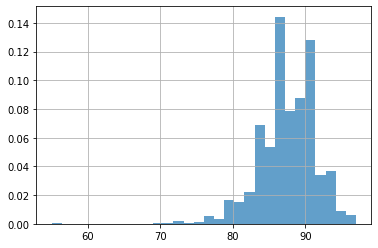

In [14]:
import matplotlib.pyplot as plt
hcahps_scores_all['Overall hospital rating - linear mean score'].hist(bins=30, density=True, alpha=0.7)
hcahps_scores_all['Overall hospital rating - linear mean score'].describe()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
CA,294.0,86.500000,4.168589,69.0,84.0,87.0,89.0,95.0
NY,139.0,84.597122,3.911557,73.0,83.0,85.0,87.0,94.0
TX,248.0,87.903226,3.819658,75.0,86.0,88.0,90.0,97.0


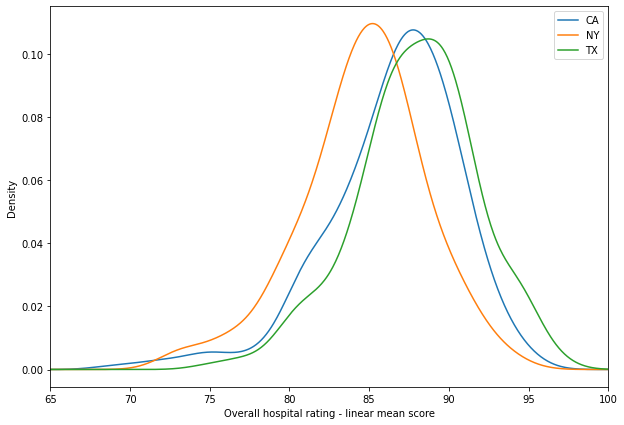

In [15]:
hcahps_scores_3states = hcahps_scores_all.loc[hcahps_scores_all['State'].isin(['CA', 'NY', 'TX'])]
hcahps_scores_3states.groupby(['State'])['Overall hospital rating - linear mean score'].plot.kde(
    xlim=(65,100),
    legend=True,
    figsize=(10,7)
)
plt.xlabel("Overall hospital rating - linear mean score")
plt.savefig('hcahps_scores_4states.png')
hcahps_scores_3states.groupby(['State'])['Overall hospital rating - linear mean score'].describe()



---



## Submitting Your Work

Submit your work as usual.